In [1]:
%pylab inline

import pickle
import gzip
from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from itertools import combinations
from collections import Counter
import networkx as nx

In [3]:
#np.unique()

# Compare results for the entropy/interevent parts.

First run:

```
mpirun -n 12 -hostfile MPIhostFile python2 04_entropyMeasuresScript_MPI.py TWT
```

for each dataset, then compare them selecting the files here.

In [4]:
# entropyFile1 = "entropySequence_MPI_APS.pkl"
# entropyFile2 = "entropySequence_MPI_URNS_APS.pkl"

# entropyData1 = pickle.load(open(entropyFile1, "rb"), encoding="latin1")
# entropyData2 = pickle.load(open(entropyFile2, "rb"), encoding="latin1")

In [ ]:
entropyFile1 = "entropySequence_MPI_MPC.pkl"
entropyFile2 = "entropySequence_URNS_MPC.pkl"

entropyData1 = pickle.load(open(entropyFile1, "rb"), encoding="latin1")
entropyData2 = pickle.load(open(entropyFile2, "rb"), encoding="latin1")

In [5]:
entropyFile1 = "entropySequence_MPI_MPC.pkl"
entropyFile2 = "entropySequence_MPI_URNS_M"

entropyData1 = pickle.load(open(entropyFile1, "rb"), encoding="latin1")
entropyData2 = pickle.load(open(entropyFile2, "rb"), encoding="latin1")

In [6]:
name1, name2 = entropyData1["name"], entropyData2["name"]
figNameSuffix = "-".join((name1, name2))

In [7]:
def plotEntropy(entropyDict, entropyDictShuf, xBins, name, ax=None,
                style1="o-C0", style2="s-C1", alpha=.05,
                xlabel=r"$k$", ylabel=r"$S(k)/\ln(k)$"):
    '''
    Expect a ditionary entropyDict made as d[binIndex] = [entropy_0, entropy_1, ...]
    and the bins associated with the index as well as the name to plot in the legend.
    '''
    Xs = np.array([xBins[k] for k, vals in sorted(entropyDict.items()) for v in vals])
    Ys = np.array([v for k, vals in sorted(entropyDict.items()) for v in vals])
    
    XsShuf = np.array([xBins[k] for k, vals in sorted(entropyDictShuf.items()) for v in vals])
    YsShuf = np.array([v for k, vals in sorted(entropyDictShuf.items()) for v in vals])    
    
    Xmed = np.array([xBins[k] for k, v in sorted(entropyDict.items())])
    Ymed = np.array([np.median(vals) for k, vals in sorted(entropyDict.items())])

    XmedShuf = np.array([xBins[k] for k, v in sorted(entropyDictShuf.items())])
    YmedShuf = np.array([np.median(vals) for k, vals in sorted(entropyDictShuf.items())])
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(6,6))
    
    for X, Y, Xm, Ym, style in zip([Xs, XsShuf], [Ys, YsShuf],
                                       [Xmed, XmedShuf], [Ymed, YmedShuf],
                                       [style1, style2]):
        ax.set_title(name, size=18)
        ax.scatter(X, Y, alpha=alpha)
        ax.plot(Xm, Ym, style)
        ax.set_xscale("log")
        ax.set_xlabel(xlabel, size=18)
        ax.set_ylabel(ylabel, size=18)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)

    
def compareEntropy(keyEntropy, keyEntropyShuf, data1, data2, xBinsKey):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    
    iii = 0
    for data in [data1, data2]:
        ax = axs[iii]
        
        plotEntropy(data[keyEntropy], data[keyEntropyShuf], data[xBinsKey], name=data["name"], ax=ax)
        
        iii += 1
    return fig

In [8]:
def compareInterevent(keyInter, keyInterShuf, data1, data2, bins=(0,5,20)):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    
    iii = 0
    for data, axe in zip([data1, data2], axs):
        ax = axs[iii]
        plotInterevent(data[keyInter], data[keyInterShuf],
                       name=data["name"], ax=axe, bins=bins)
        iii += 1
    return fig, axs

def plotInterevent(interOriginal, interShuffled, name, ax=None,
                style1="o-C0", style2="s-C1", alpha=.05,
                xlabel=r"$\tau$", ylabel=r"$P(\tau)$", bins=(0,4,20)):
    
    Yo = np.array([v for vals in interOriginal for v in vals])
    Ys = np.array([v for vals in interShuffled for v in vals])
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(6,6))
    
    ax.set_title(name, size=18)
    for Y, style in zip([Yo, Ys], [style1, style2]):
        f, b = np.histogram(Y, bins=np.logspace(*bins), density=True)
        b = (b[1:]+b[:-1])/2.
        b = b[f>0]
        f = f[f>0]
        ax.loglog(b, f, style, label="gesu")
        
    ax.set_xlabel(xlabel, size=18)
    ax.set_ylabel(ylabel, size=18)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)


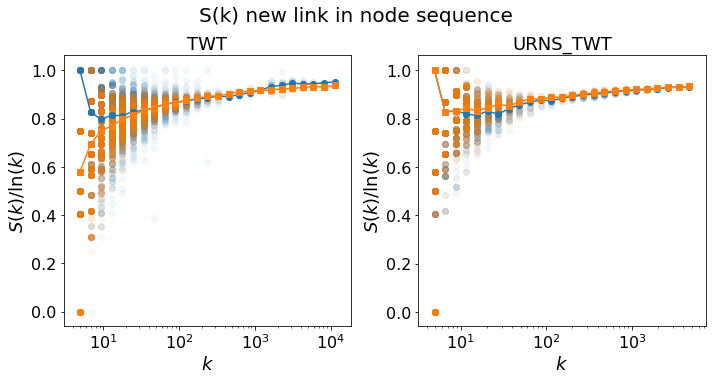

In [9]:
fig = compareEntropy("entropyNewLink", "entropyNewLinkShuf",
                     entropyData1, entropyData2,
                     "degreeBins")

fig.suptitle("S(k) new link in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNewLinkUserS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNewLinkUserS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

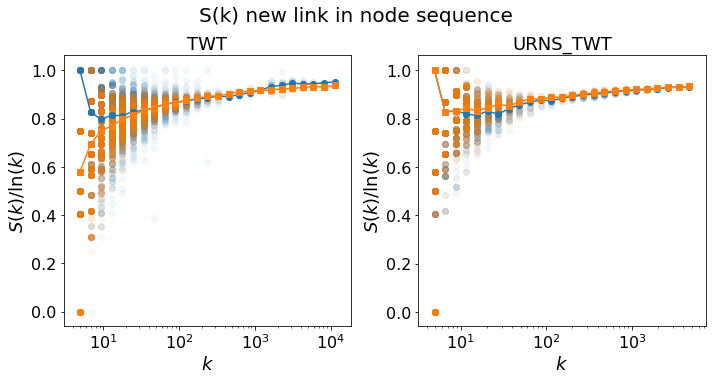

In [10]:
fig = compareEntropy("entropyNewLink", "entropyNewLinkShuf",
                     entropyData1, entropyData2,
                     "degreeBins")

fig.suptitle("S(k) new link in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNewLinkUserS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNewLinkUserS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

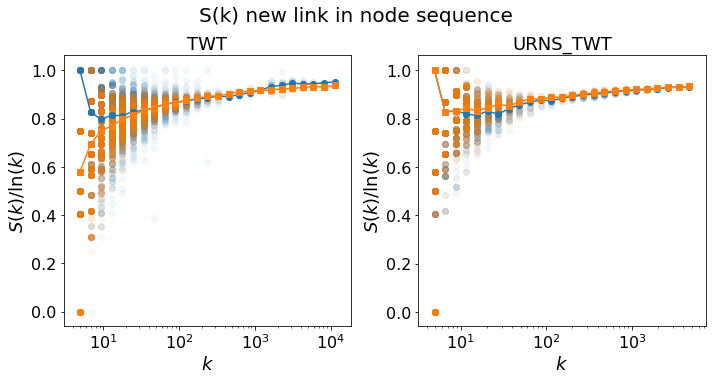

In [11]:
fig = compareEntropy("entropyNewLink", "entropyNewLinkShuf",
                     entropyData1, entropyData2,
                     "degreeBins")

fig.suptitle("S(k) new link in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNewLinkUserS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNewLinkUserS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

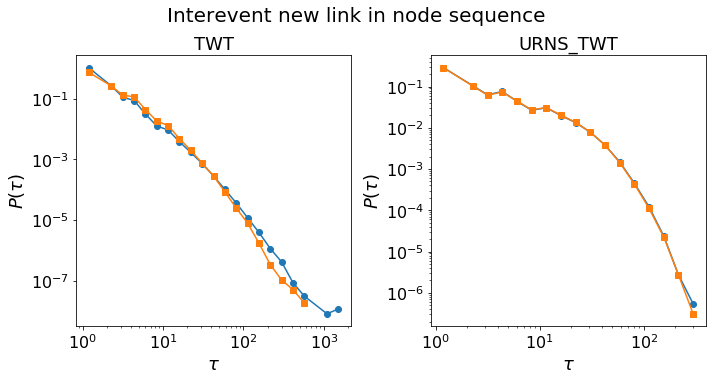

In [12]:
fig, axs = compareInterevent("interevent", "intereventShuf",
                    entropyData1, entropyData2,
                    bins=(0,5.5,40),
                       )

fig.suptitle("Interevent new link in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNewLinkUserdT_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNewLinkUserdT_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

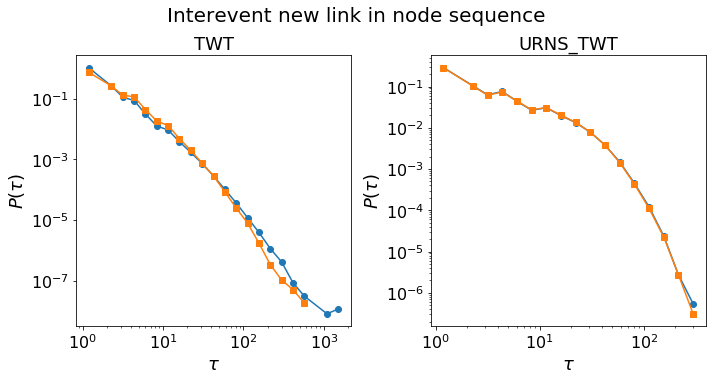

In [13]:
fig, axs = compareInterevent("interevent", "intereventShuf",
                    entropyData1, entropyData2,
                    bins=(0,5.5,40),
                       )

fig.suptitle("Interevent new link in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNewLinkUserdT_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNewLinkUserdT_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


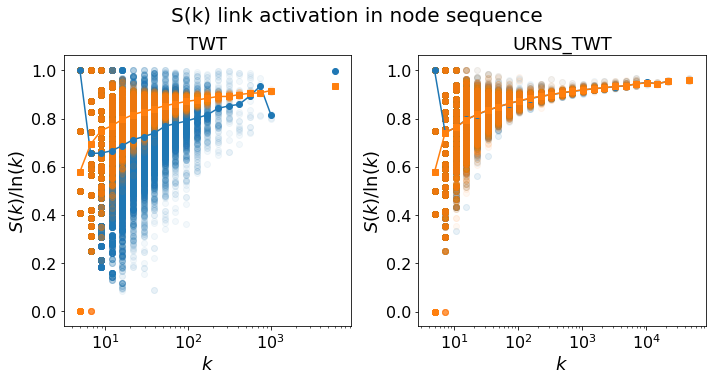

In [14]:
fig = compareEntropy("entropyPerLink", "entropyPerLinkShuf",
                  entropyData1, entropyData2,
                    "linkStrengthBins"
                    )

fig.suptitle("S(k) link activation in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyLinkActivationUserS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyLinkActivationUserS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


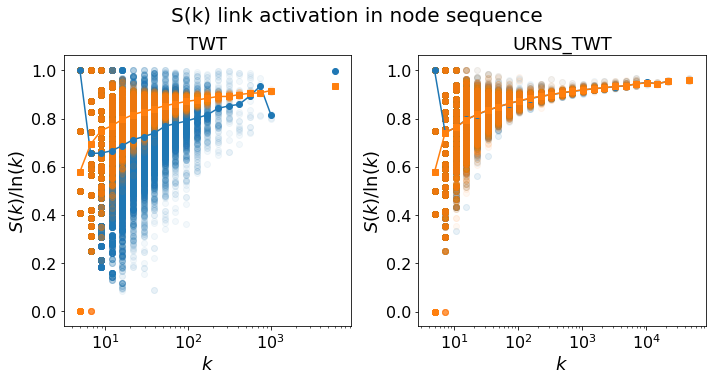

In [15]:
fig = compareEntropy("entropyPerLink", "entropyPerLinkShuf",
                  entropyData1, entropyData2,
                    "linkStrengthBins"
                    )

fig.suptitle("S(k) link activation in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyLinkActivationUserS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyLinkActivationUserS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

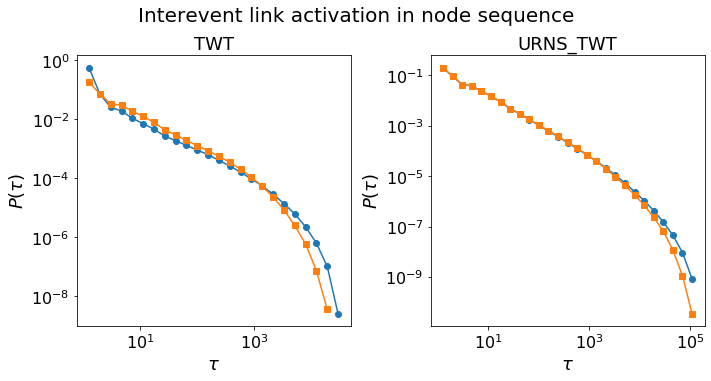

In [16]:
fig, axs = compareInterevent("intereventPerLink", "intereventPerLinkShuf",
                     entropyData1, entropyData2,
                    bins=(0,5.5,30)
                       )

fig.suptitle("Interevent link activation in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyLinkActivationUserdT_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyLinkActivationUserdT_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

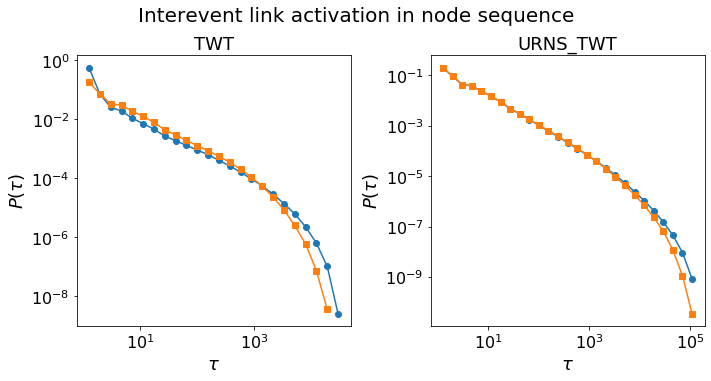

In [17]:
fig, axs = compareInterevent("intereventPerLink", "intereventPerLinkShuf",
                     entropyData1, entropyData2,
                    bins=(0,5.5,30)
                       )

fig.suptitle("Interevent link activation in node sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyLinkActivationUserdT_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyLinkActivationUserdT_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

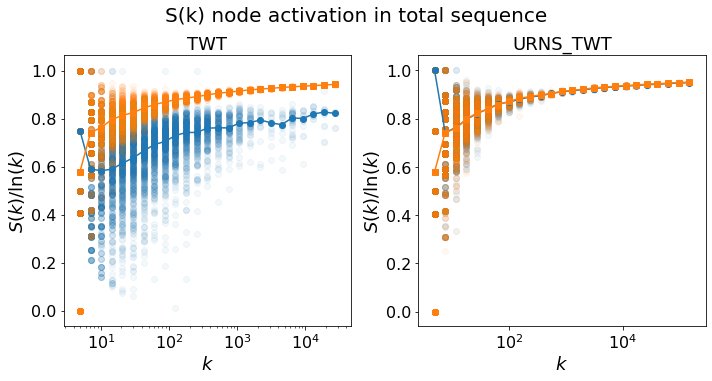

In [18]:
fig = compareEntropy("entropyNodeTot", "entropyNodeTotShuf",
                     entropyData1, entropyData2,
                     "strengthBins")

fig.suptitle("S(k) node activation in total sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNodeActivationTotS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNodeActivationTotS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

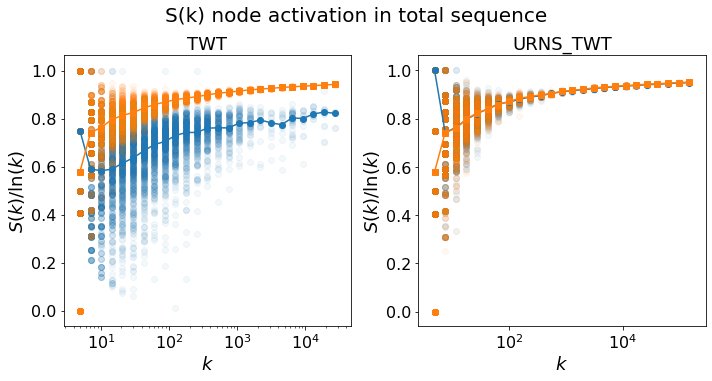

In [19]:
fig = compareEntropy("entropyNodeTot", "entropyNodeTotShuf",
                     entropyData1, entropyData2,
                     "strengthBins")

fig.suptitle("S(k) node activation in total sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNodeActivationTotS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNodeActivationTotS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

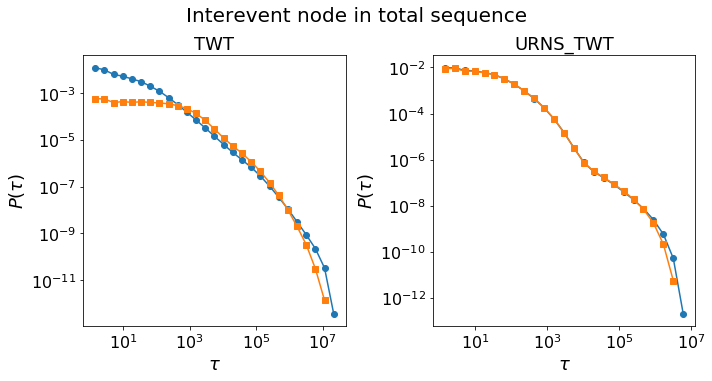

In [20]:
fig, axs = compareInterevent("intereventNodeTot", "intereventNodeTotShuf",
                     entropyData1, entropyData2,
                             bins=(0,8,30)
                       )

fig.suptitle("Interevent node in total sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNodeActivationTotdT_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNodeActivationTotdT_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

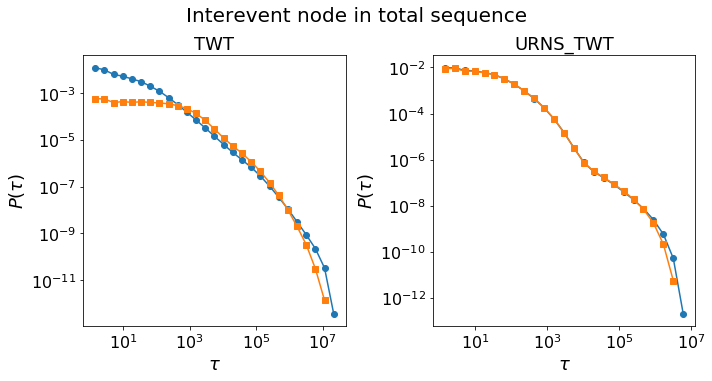

In [21]:
fig, axs = compareInterevent("intereventNodeTot", "intereventNodeTotShuf",
                     entropyData1, entropyData2,
                             bins=(0,8,30)
                       )

fig.suptitle("Interevent node in total sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyNodeActivationTotdT_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyNodeActivationTotdT_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


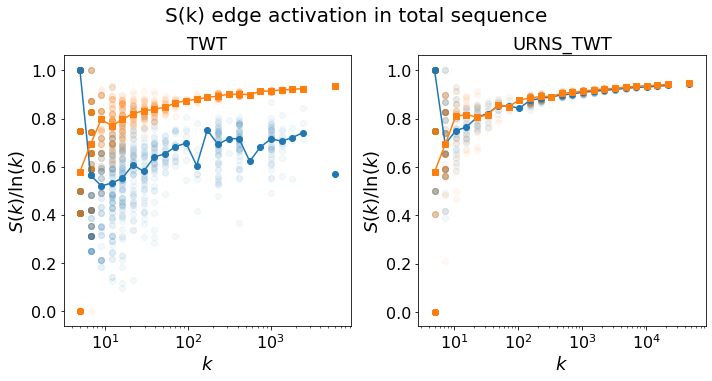

In [22]:
fig = compareEntropy("entropyPerLinkTot", "entropyPerLinkTotShuf",
                     entropyData1, entropyData2,
                     "linkStrengthBins")

fig.suptitle("S(k) edge activation in total sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyLinkActivationTotS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyLinkActivationTotS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


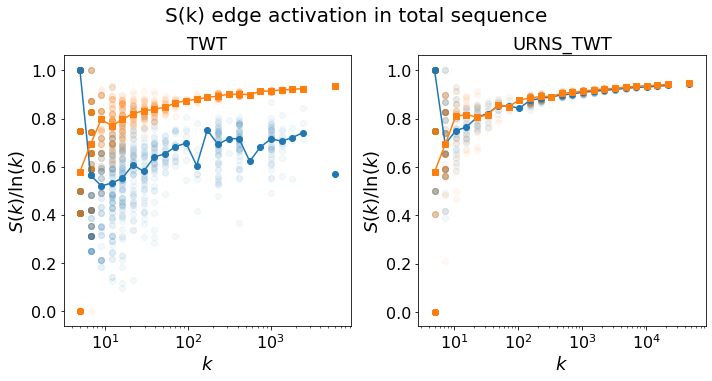

In [23]:
fig = compareEntropy("entropyPerLinkTot", "entropyPerLinkTotShuf",
                     entropyData1, entropyData2,
                     "linkStrengthBins")

fig.suptitle("S(k) edge activation in total sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyLinkActivationTotS_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyLinkActivationTotS_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

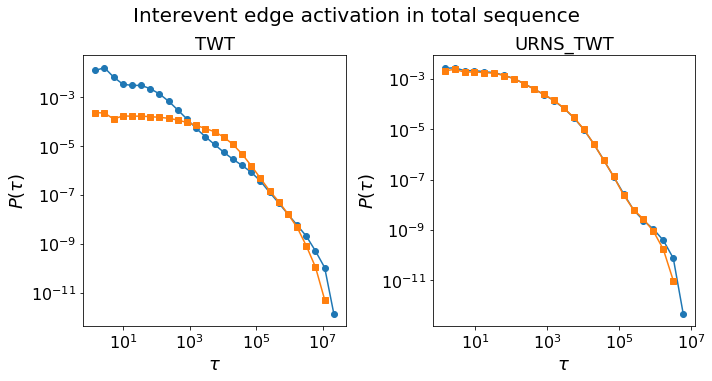

In [24]:
fig, axs = compareInterevent("intereventPerLinkTot", "intereventPerLinkTotShuf",
                     entropyData1, entropyData2,
                             bins=(0,8,30)
                       )

fig.suptitle("Interevent edge activation in total sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyLinkActivationTotdT_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyLinkActivationTotdT_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

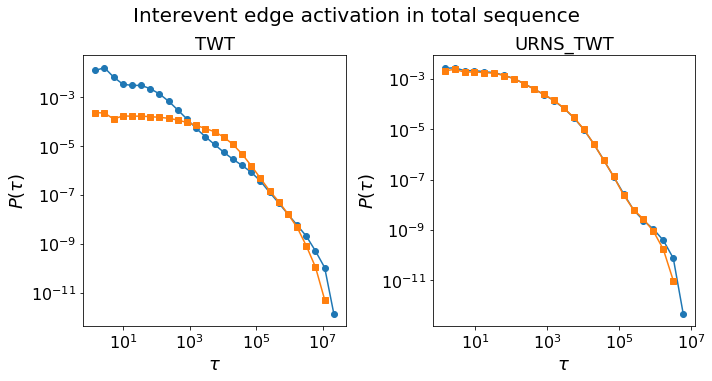

In [25]:
fig, axs = compareInterevent("intereventPerLinkTot", "intereventPerLinkTotShuf",
                     entropyData1, entropyData2,
                             bins=(0,8,30)
                       )

fig.suptitle("Interevent edge activation in total sequence", size=20, y=1.05)
fig.tight_layout()
fig.savefig("entropyLinkActivationTotdT_%s.pdf" % figNameSuffix, bbox_inches="tight")
fig.savefig("entropyLinkActivationTotdT_%s.png" % figNameSuffix, bbox_inches="tight", dpi=300)

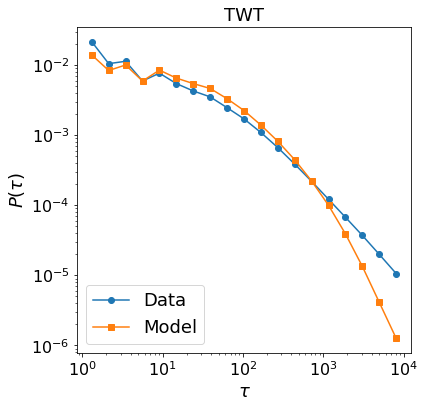

In [31]:
interOriginal = entropyData1["intereventNodeTot"]
interShuffled = entropyData2["intereventNodeTot"]

name = "TWT"

name1, name2 = "Data", "Model"

style1="o-C0"
style2="s-C1"
alpha=.05,
xlabel=r"$\tau$"
ylabel=r"$P(\tau)$"
bins=(0,4,20)
    
Yo = np.array([v for vals in interOriginal for v in vals])
Ys = np.array([v for vals in interShuffled for v in vals])
    
fig, ax = plt.subplots(1,1,figsize=(6,6))
    
ax.set_title(name, size=18)
for Y, style, label in zip([Yo, Ys], [style1, style2], [name1, name2]):
    f, b = np.histogram(Y, bins=np.logspace(*bins), density=True)
    b = (b[1:]+b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    ax.loglog(b, f, style, label=label)
        
ax.set_xlabel(xlabel, size=18)
ax.set_ylabel(ylabel, size=18)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.legend(loc=3, fontsize=18)

# Old and junk....

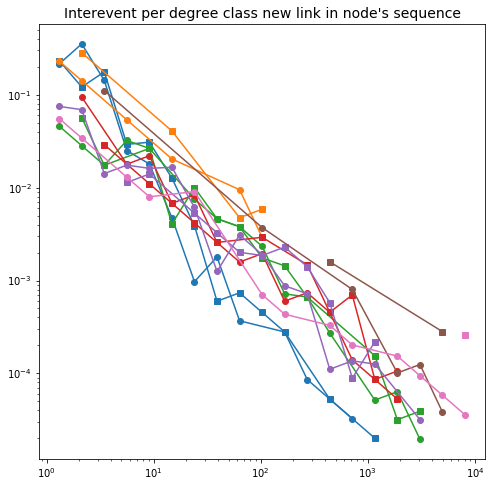

In [1193]:
# Plot the interevent per degree class
plt.figure(figsize=(8,8))
plt.title("Interevent per degree class new link in node's sequence", size=14)
iii = 0
for vals, valsShuf in zip(interevent, intereventShuf)[::4]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    plt.loglog(b, f, "o-C%d" % (iii%10))
    
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    bS = (bS[1:] + bS[:-1])/2.
    bS = bS[fS>0]
    fS = fS[fS>0]
    plt.loglog(bS, fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

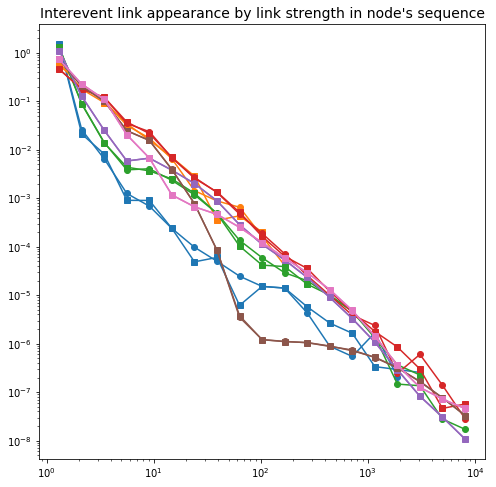

In [1196]:
# Plot the interevent per strength class
plt.figure(figsize=(8,8))
plt.title("Interevent link appearance by link strength in node's sequence", size=14)
iii = 0
for vals, valsShuf in zip(intereventPerLink, intereventPerLinkShuf)[::4]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    plt.loglog(b, f, "o-C%d" % (iii%10))
    
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    bS = (bS[1:] + bS[:-1])/2.
    bS = bS[fS>0]
    fS = fS[fS>0]
    plt.loglog(bS, fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

# URNS twt like

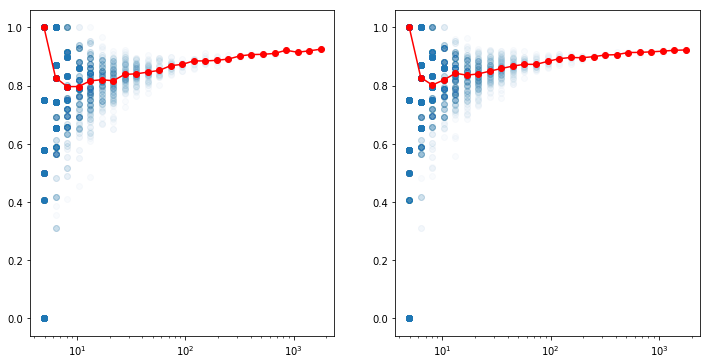

In [261]:
Xs = np.array([degreeBins[k] for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyNewLinkShuf.iteritems() for v in vals])

Xmed = np.sort([degreeBins[k] for k in entropyNewLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLinkShuf.iteritems())])



plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "o-r")
plt.xscale("log")

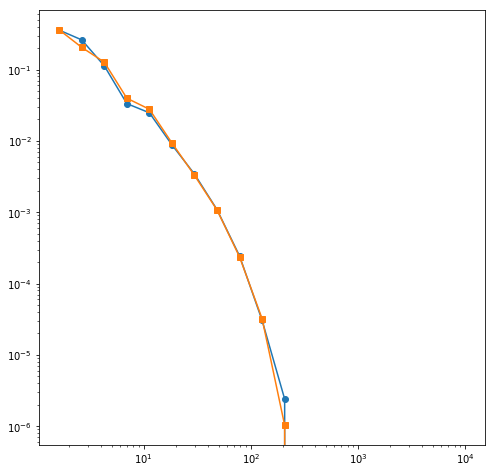

In [262]:
Ys = np.array([v for vals in interevent for v in vals])
YsShuf = np.array([v for vals in intereventShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

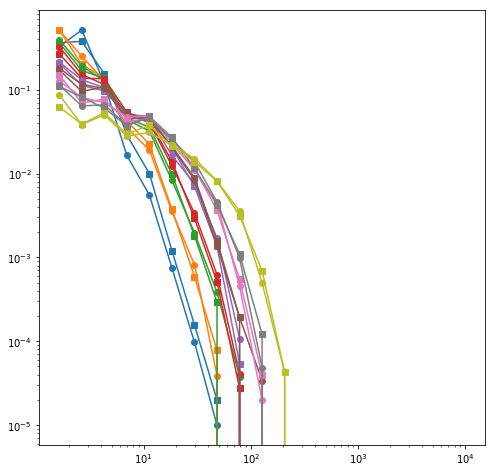

In [263]:
# Plot the interevent per degree class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(interevent, intereventShuf)[::3]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

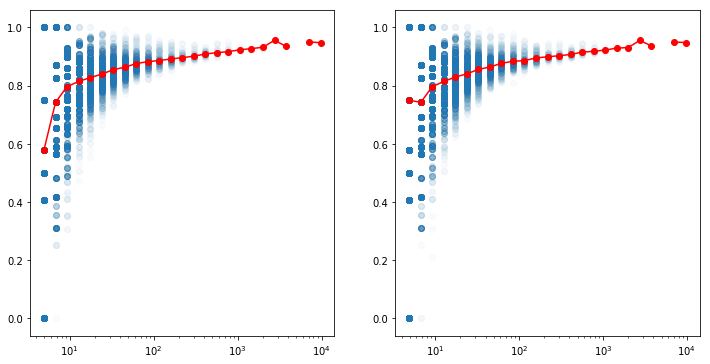

In [268]:
Xs = np.array([linkStrengthBins[k] for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyPerLinkShuf.iteritems() for v in vals])

Xmed = np.sort([linkStrengthBins[k] for k in entropyPerLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLinkShuf.iteritems())])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "o-r")
plt.xscale("log")

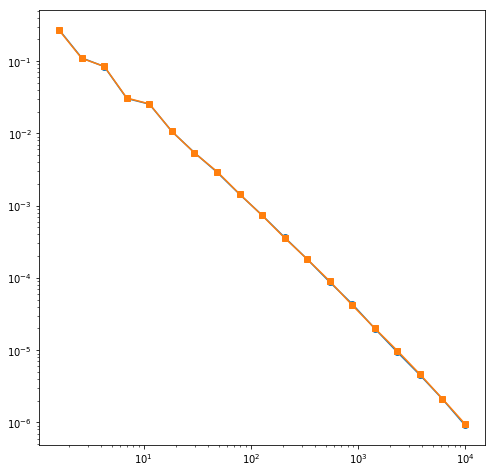

In [265]:
Ys = np.array([v for vals in intereventPerLink for v in vals])
YsShuf = np.array([v for vals in intereventPerLinkShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

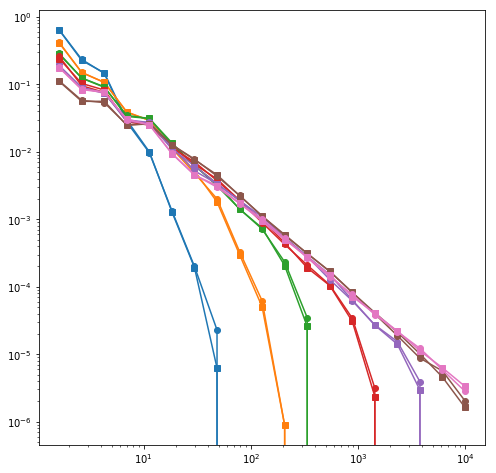

In [266]:
# Plot the interevent per strength class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(intereventPerLink, intereventPerLinkShuf)[::4]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

# TWT

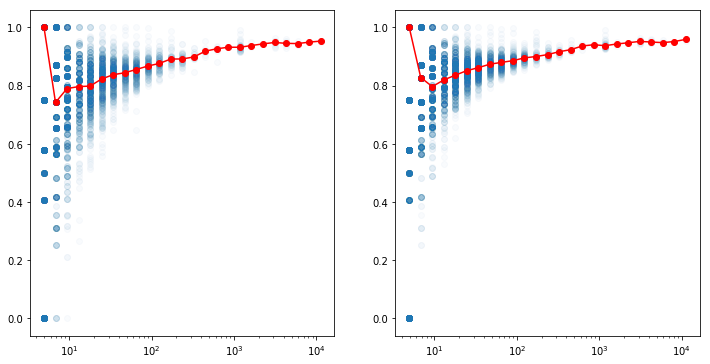

In [226]:
Xs = np.array([degreeBins[k] for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyNewLinkShuf.iteritems() for v in vals])

Xmed = np.sort([degreeBins[k] for k in entropyNewLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLinkShuf.iteritems())])



plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "o-r")
plt.xscale("log")

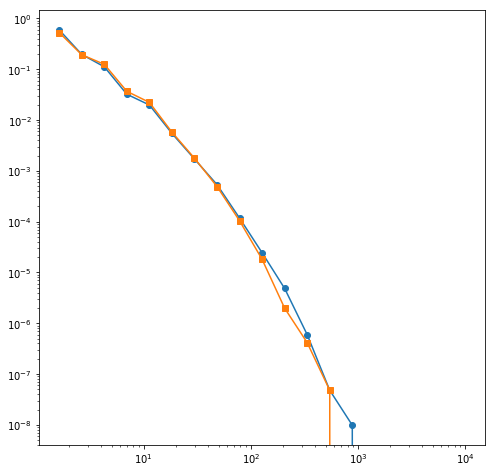

In [216]:
Ys = np.array([v for vals in interevent for v in vals])
YsShuf = np.array([v for vals in intereventShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

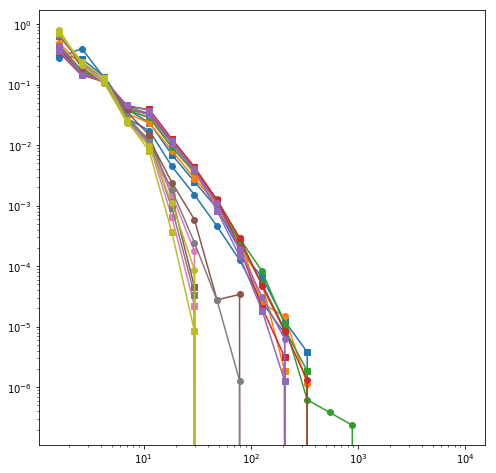

In [224]:
# Plot the interevent per degree class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(interevent, intereventShuf)[::3]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

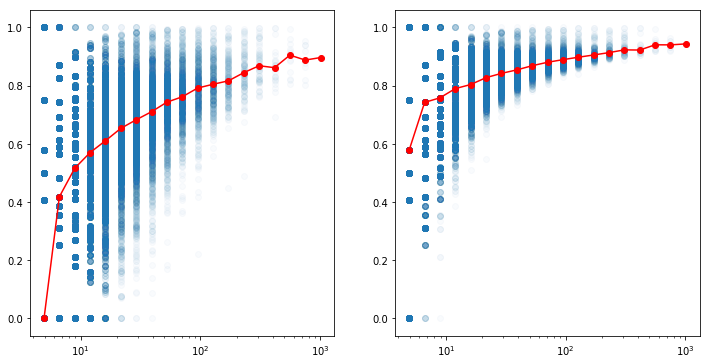

In [231]:
Xs = np.array([linkStrengthBins[k] for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyPerLinkShuf.iteritems() for v in vals])

Xmed = np.sort([linkStrengthBins[k] for k in entropyPerLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLinkShuf.iteritems())])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "o-r")
plt.xscale("log")

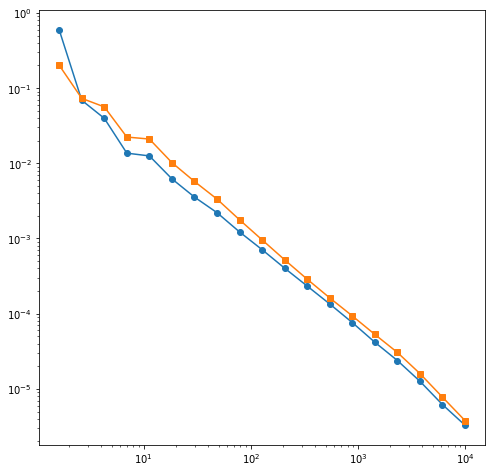

In [220]:
Ys = np.array([v for vals in intereventPerLink for v in vals])
YsShuf = np.array([v for vals in intereventPerLinkShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

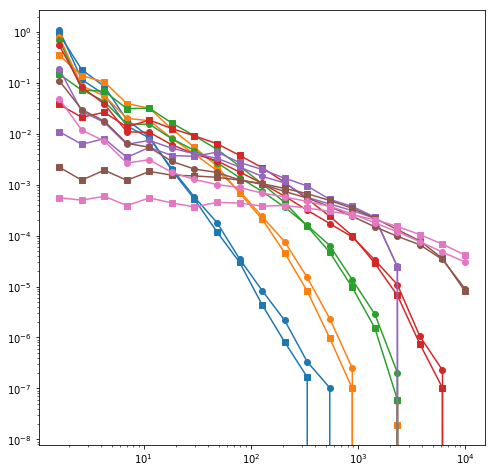

In [229]:
# Plot the interevent per strength class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(intereventPerLink, intereventPerLinkShuf)[::4]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

# URNS APS like

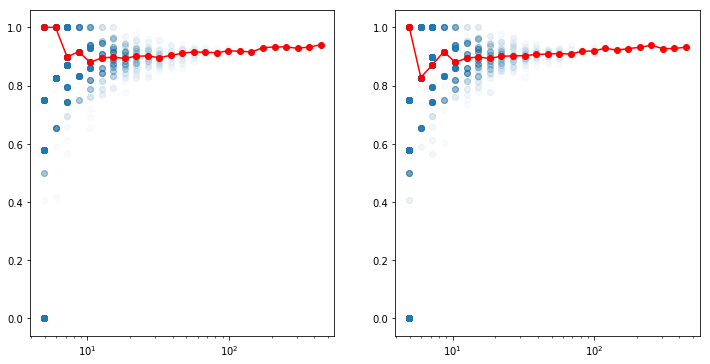

In [293]:
Xs = np.array([degreeBins[k] for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyNewLinkShuf.iteritems() for v in vals])

Xmed = np.sort([degreeBins[k] for k in entropyNewLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLinkShuf.iteritems())])



plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "o-r")
plt.xscale("log")

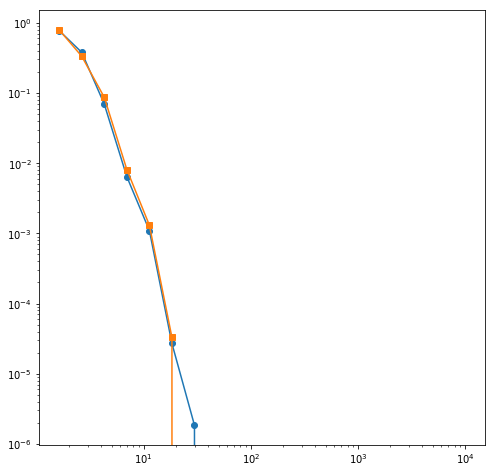

In [294]:
Ys = np.array([v for vals in interevent for v in vals])
YsShuf = np.array([v for vals in intereventShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

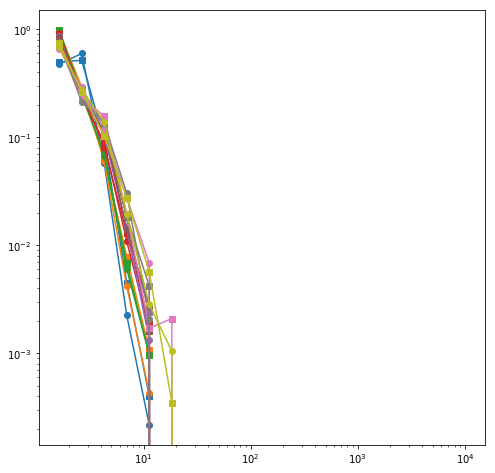

In [295]:
# Plot the interevent per degree class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(interevent, intereventShuf)[::3]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

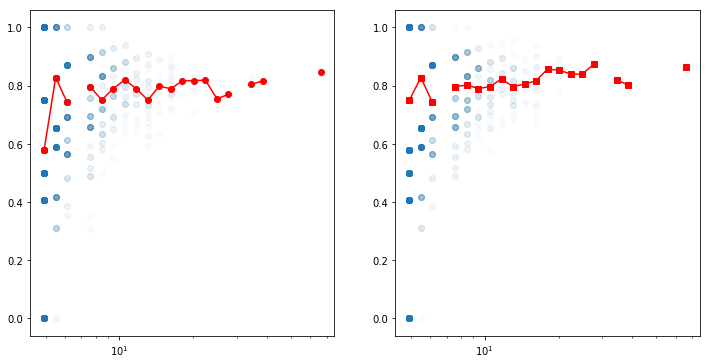

In [300]:
Xs = np.array([linkStrengthBins[k] for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyPerLinkShuf.iteritems() for v in vals])

Xmed = np.sort([linkStrengthBins[k] for k in entropyPerLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLinkShuf.iteritems())])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "s-r")
plt.xscale("log")

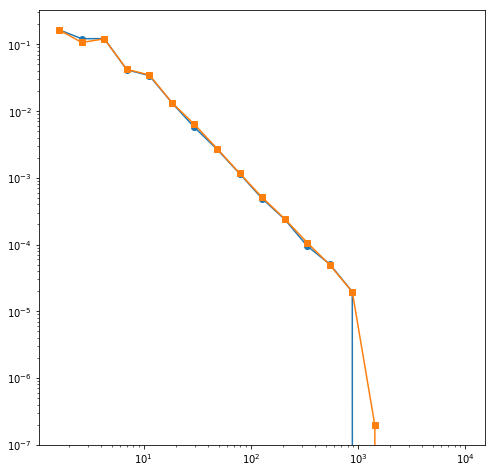

In [297]:
Ys = np.array([v for vals in intereventPerLink for v in vals])
YsShuf = np.array([v for vals in intereventPerLinkShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

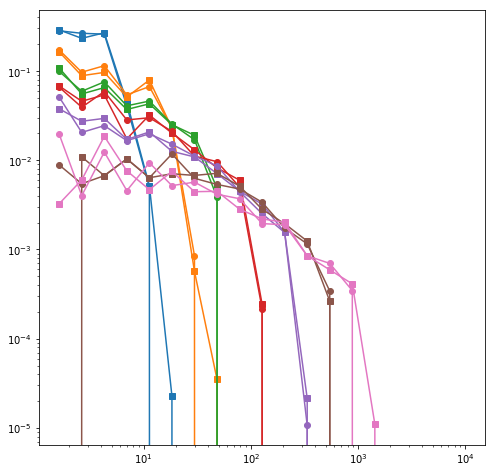

In [298]:
# Plot the interevent per strength class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(intereventPerLink, intereventPerLinkShuf)[::4]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

# APS 60

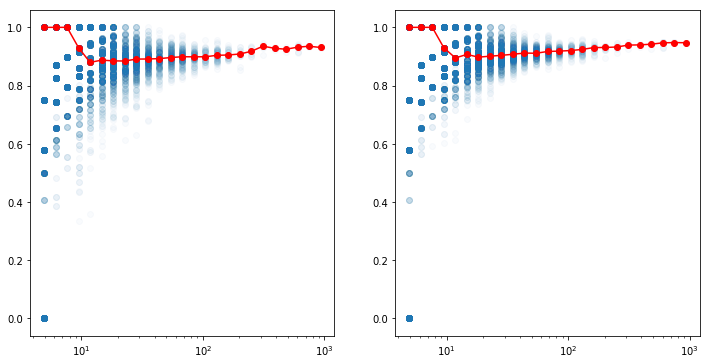

In [242]:
Xs = np.array([degreeBins[k] for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyNewLinkShuf.iteritems() for v in vals])

Xmed = np.sort([degreeBins[k] for k in entropyNewLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLinkShuf.iteritems())])



plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "o-r")
plt.xscale("log")

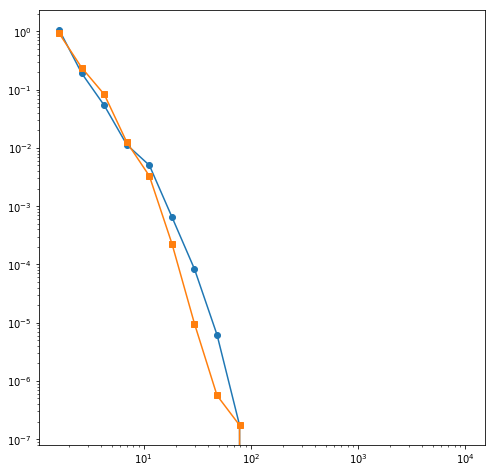

In [243]:
Ys = np.array([v for vals in interevent for v in vals])
YsShuf = np.array([v for vals in intereventShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

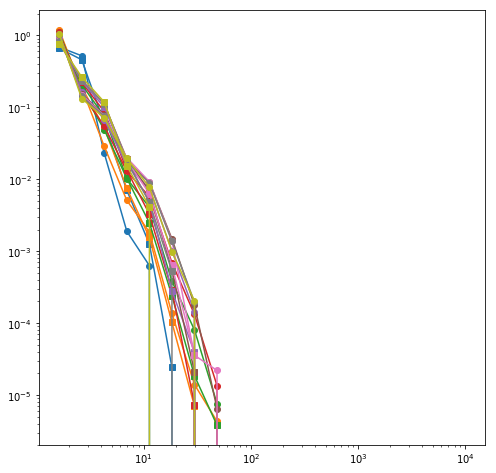

In [244]:
# Plot the interevent per degree class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(interevent, intereventShuf)[::3]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

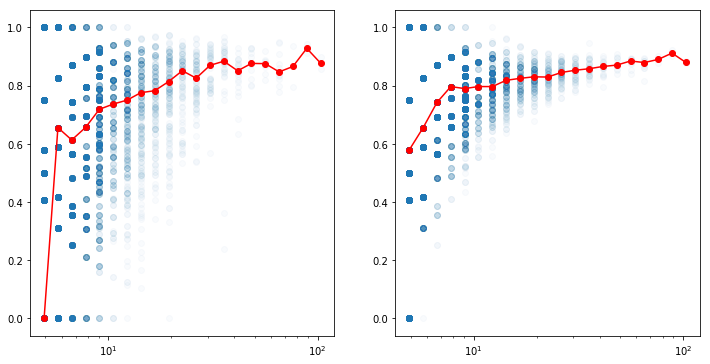

In [249]:
Xs = np.array([linkStrengthBins[k] for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyPerLinkShuf.iteritems() for v in vals])

Xmed = np.sort([linkStrengthBins[k] for k in entropyPerLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLinkShuf.iteritems())])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "o-r")
plt.xscale("log")

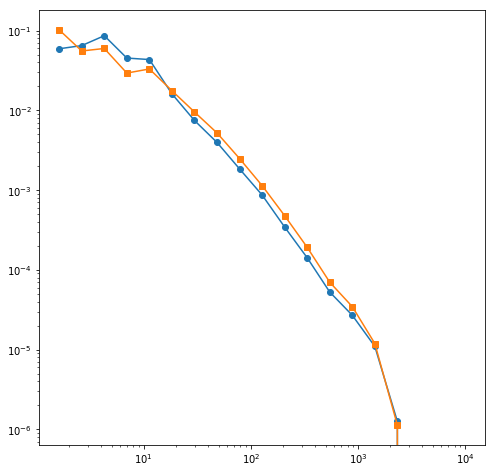

In [250]:
Ys = np.array([v for vals in intereventPerLink for v in vals])
YsShuf = np.array([v for vals in intereventPerLinkShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

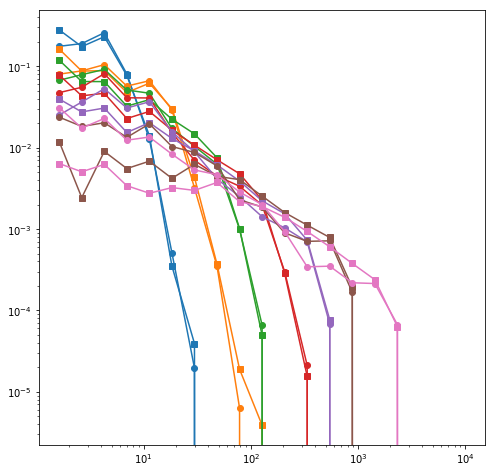

In [251]:
# Plot the interevent per strength class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(intereventPerLink, intereventPerLinkShuf)[::4]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

# URNS MPC like

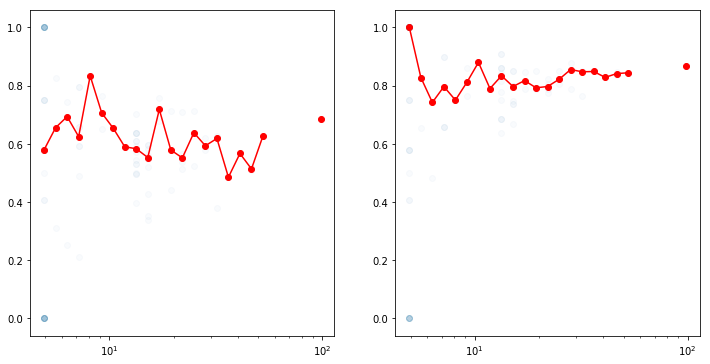

In [332]:
Xs = np.array([degreeBins[k] for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyNewLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyNewLinkShuf.iteritems() for v in vals])

Xmed = np.sort([degreeBins[k] for k in entropyNewLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyNewLinkShuf.iteritems())])



plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "o-r")
plt.xscale("log")

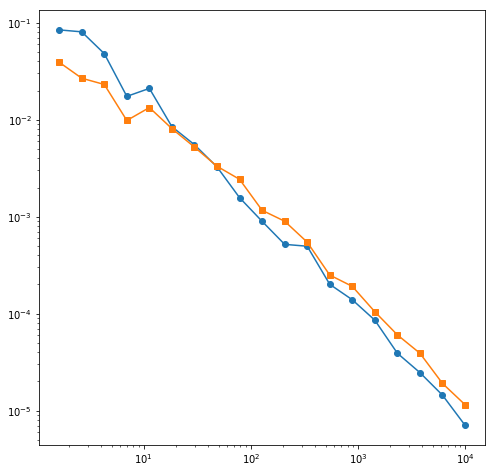

In [333]:
Ys = np.array([v for vals in interevent for v in vals])
YsShuf = np.array([v for vals in intereventShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

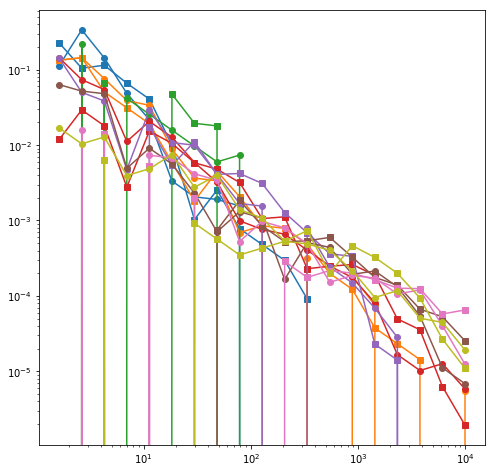

In [334]:
# Plot the interevent per degree class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(interevent, intereventShuf)[::3]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")

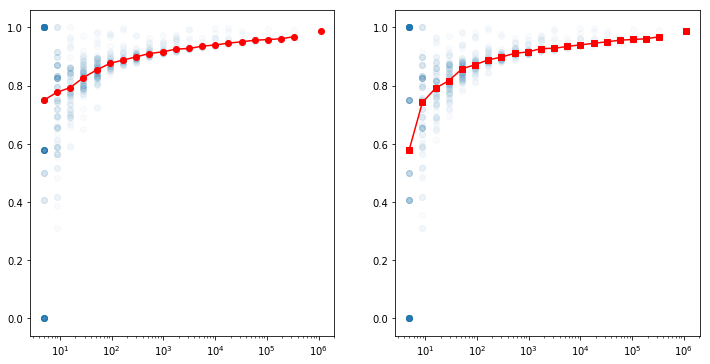

In [335]:
Xs = np.array([linkStrengthBins[k] for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
Ys = np.array([v for k, vals in sorted(entropyPerLink.iteritems()) for v in vals])
YsShuf = np.array([v for k, vals in entropyPerLinkShuf.iteritems() for v in vals])

Xmed = np.sort([linkStrengthBins[k] for k in entropyPerLink])
Ymed = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLink.iteritems())])
YmedShuf = np.array([np.median(np.sort(vals)) for k, vals in sorted(entropyPerLinkShuf.iteritems())])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xs, Ys, alpha=.025)
plt.plot(Xmed, Ymed, "o-r")
plt.xscale("log")

plt.subplot(1,2,2)
plt.scatter(Xs, YsShuf, alpha=.025)
plt.plot(Xmed, YmedShuf, "s-r")
plt.xscale("log")

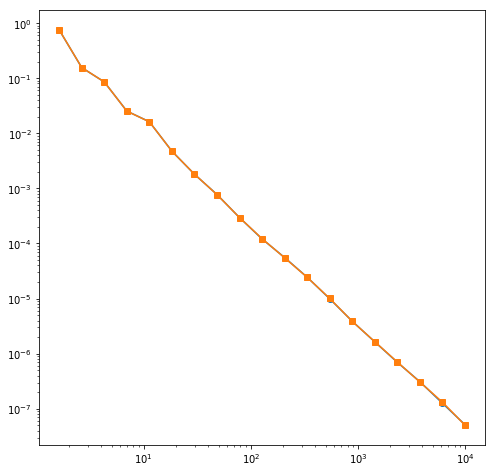

In [336]:
Ys = np.array([v for vals in intereventPerLink for v in vals])
YsShuf = np.array([v for vals in intereventPerLinkShuf for v in vals])

plt.figure(figsize=(8,8))
f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
plt.loglog(b[1:], f, "o-C0")
plt.loglog(bS[1:], fS, "s-C1")
#plt.xscale("log")

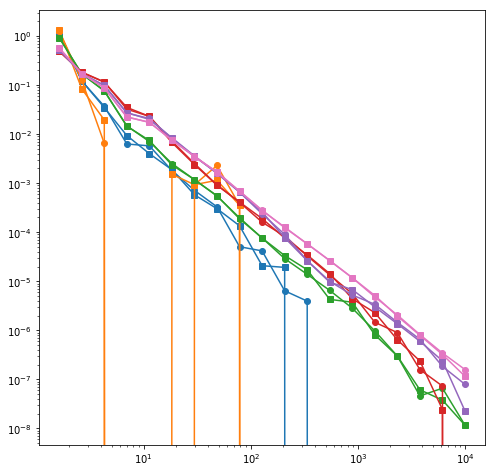

In [337]:
# Plot the interevent per strength class
plt.figure(figsize=(8,8))

iii = 0
for vals, valsShuf in zip(intereventPerLink, intereventPerLinkShuf)[::4]:
    Ys = np.array([v for v in vals])
    YsShuf = np.array([v for v in valsShuf])


    f, b = np.histogram(Ys, bins=np.logspace(0, 4, 20), density=True)
    fS, bS = np.histogram(YsShuf, bins=np.logspace(0, 4, 20), density=True)
    plt.loglog(b[1:], f, "o-C%d" % (iii%10))
    plt.loglog(bS[1:], fS, "s-C%d" % (iii%10))
    
    iii += 1
#plt.xscale("log")